# Ex.02: Monthly Wolf sunspot number

The second example focus on the analysis of monthly Wolf sunspot number. Data is available from 1749 (Source: [WDC-SILSO](\href{http://www.sidc.be/silso/datafiles), Royal Observatory of Belgium, Brussels). The signal contains the well-known 11 years Schwabe cycle, the 22 years one and smaller time scales variations described in [[1]](#1). The analysis focus on the detection of these cycles from 22 years down to the seasonal scale. The steps will be the following: 

1. Load marinetools packages
2. Read the input data and create the dictionary to fit the non-stationary probability model (PM)
3. Call marinetools.temporal.analysis.marginalfit for fitting the parameters of the PM

## 1. Load marinetools packages

The following code load the basic functions (read data, analysis and plots) included in marinetools

In [1]:
from marinetools.utils import read
from marinetools.temporal import analysis
from marinetools.graphics import plots

## 2. Read the input data and create the dictionary to make the marginal fit

As sometimes happens, data did not come in datetime format. In this example the data is read adding a dateparser to create a pandas DataFrame which indexes are datetimes. The following code read the file of monthly sunspots. The input file is a txt file. As usually, some noise is included to ensure that the input variable is continuous and not discrete.

In [2]:
from datetime import datetime
import pandas as pd

monthly_date_parser = lambda x: datetime.strptime(x, "%Y-%m")

data = pd.read_csv(
    "data/sunspots.txt",
    index_col=0,
    parse_dates=["Month"],
    date_parser=monthly_date_parser,
)
data = analysis.nanoise(data, "Sunspots")

Once the data is read, it is create the dictionary with the properties about the temporal expansion of parameters and the probability models. In this example, a piecewise function compound by two models was selected, where a lognorm PM will fit the body and a Gaussian model will fit the upper tail. The percentil matching point is 0.85. As we are looking for larger oscillations, a basis period of 22 years will be set-up. Both PMs will be expanded in time using the sinusoidal temporal expansion and 44 terms to include the seasonal behaviour. To be faster, run first this example with 6 terms and see the results and then, run again with 44 terms. This information is translated to the dictionary as follow.

In [3]:
params = {
    "var": "Sunspots",
    "fun": {0: "lognorm", 1: "norm"},
    "non_stat_analysis": True,
    "basis_function": {
        "method": "modified",
        "no_terms": 4,
    },
    "ws_ps": [0.85],
    "basis_period": [22],
}

## 3. Make the marginal fit
The following code will fit the parameters to the data.

In [4]:
analysis.marginalfit(data, params)

2022-01-21 11:35:15.145 | INFO     | marinetools.temporal.analysis:marginalfit:121 - 
 Initializing MarineTools.temporal, v.1.0.0
Copyright (C) 2021 Environmental Fluid Dynamics Group (University of Granada)
This program is free software; you can redistribute it and/or modify it under
the terms of the GNU General Public License as published by the Free Software
Foundation; either version 3 of the License, or (at your option) any later 
version.
This program is distributed in the hope that it will be useful, but WITHOUT 
ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with
this program; if not, write to the Free Software Foundation, Inc., 675 Mass
Ave, Cambridge, MA 02139, USA.
2022-01-21 11:35:15.146 | INFO     | marinetools.temporal.analysis:marginalfit:122 - Current Time = 11:35:15

2022-01-21 11:35:15.149

{'var': 'Sunspots',
 'fun': {0: 'lognorm', 1: 'norm'},
 'non_stat_analysis': True,
 'basis_function': {'method': 'modified',
  'no_terms': 4,
  'periods': [1.0, 0.5, 0.3333333333333333, 0.25],
  'order': 4},
 'ws_ps': [0.85],
 'basis_period': [22],
 'no_param': {0: 3, 1: 2},
 'scipy': {0: True, 1: True},
 'reduction': False,
 'no_tot_param': 5,
 'transform': {'make': False, 'plot': False},
 'no_fun': 2,
 'par': [0.6344658532789471,
  3.593014975663449e-05,
  3.446532885581949e-05,
  -0.1307833467297878,
  7.998761400996057e-06,
  6.533940500177543e-06,
  0.4497674424852112,
  4.6720069621658034e-05,
  4.5255248720837206e-05,
  0.4429988814456447,
  0.0001214082477832782,
  0.00011994342688242249,
  0.39007021807486,
  0.00014106577179926396,
  0.00013960095089848604,
  0.9977132539741607],
 'mode': [1, 1],
 'optimization': {'method': 'SLSQP',
  'eps': 1e-07,
  'maxiter': 100.0,
  'ftol': 0.0001,
  'giter': 10,
  'bounds': 0.5},
 'constraints': True,
 'piecewise': False,
 'circular': Fa

The optimization of this case takes more time than example 01 due to the tool is optimizing 88 times the parameters (44 times per 2 probability models) and more than 400 parameteres are been optimized (3 parameters of the lognorm per 2 parameters of each expansion order per order 44 plus the parameters of the Gaussian probability model). The result will be saved to the file "Sunspots_lognorm_norm_0.85_nonst_22_modified_44_SLSQP.json" in the folder "marginalfit". Read carefully the information that the tool gives in the shell to understand that the parameters are passed correctly. You can also read the json file with any text editor and follows the results as in the previous dictionary.

## 4. Verificate the marginal fit

The non-stationary empirical and theoretical cumulative distribution functions are plotted. The following code shows some more options to modify the windows scale, that differs from the previous example while it is monthly timeseries. As it can be observed, some properties of the plot such as the windows lenght for the empirical non-stationary cumulative distribution function, the percentiles and the option to include an second real time axis can be chosen.

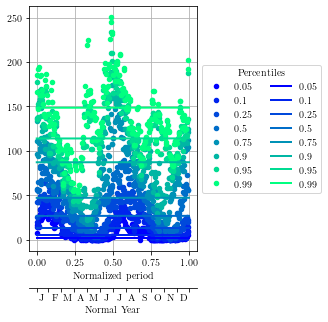

<AxesSubplot:xlabel='Normalized period'>

In [5]:
import numpy as np

params = read.rjson("marginalfit/Sunspots_lognorm_norm_0.85_nonst_22_modified_4_SLSQP")

plots.nonstationary_cdf(
    data,
    "Sunspots",
    params,
    date_axis=True,
    daysWindowsLength=30,
    equal_windows=True,
    pemp=np.array([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]),
)

In some cases, while the optimization algorithm converged, the minimum found is local and the parameters are not so good. In those cases, it is required to modify the input parameters (PMs, thresholds, and number of terms). More information about this analysis can be found in [[2]](#2) and [[3]](#3).

## References
<a id="1">[1]</a> 
Usoskin, IG and Mursula, K (2003). 
Long-term solar cycle evolution: review of recent developments
Solar Physics, 218(1), 319-343.


<a id="2">[2]</a> 
M. Cobos, P. Otiñar, P. Magaña, A. Lira-Loarca, A. Baquerizo (2021). 
MarineTools.temporal (v 1.0.0): A Python package to simulate Earth and environmental timeseries
Submitted to Environmental Modelling & Software.


<a id="3">[3]</a> 
Cobos, M., Otíñar, P., Magaña, P., Baquerizo, A. (2021).
A method to characterize and simulate climate, earth or environmental vector random processes. 
Submitted to Stochastic Environmental Research and Risk Assessment.